<a href="https://colab.research.google.com/github/molotkova/numerical_analysis/blob/master/week_10_boundary_value_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. **Is this method stable for step size $h=0.125$?** Find number of grid points required to achieve accuracy of the order of 1e-4.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-4.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [0]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.integrate import simps

plt.style.use('ggplot')
%matplotlib notebook
%matplotlib inline

In [0]:
def SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation

    # you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)

    # out:
    # y - array of float, solution of the BVP
    nodes = np.linspace(a, b, N + 1)  # N+1 elements in array, index from 0 to N
    h = nodes[1] - nodes[0]  # uniform grid

    # to solve problem let's construct LES: C*y = b

    # C is a tridiagonal coefficient matrix:
    upper_diag = 1 / h ** 2 + p(nodes) / (2 * h)  # C[i,i+1]
    main_diag = -2 / h ** 2 + q(nodes)  # C[i,i]
    lower_diag = 1 / h ** 2 - p(nodes) / (2 * h)  # C [i,i-1]

    C = np.diagflat(upper_diag[:N], k=1) + \
        np.diag(main_diag) + np.diagflat(lower_diag[1:], k=-1)

    b = f(nodes)

    # consider boundary cond. in C matrix & b vector:
    C[0, 0] = alpha[0] - 3/2 * alpha[1] / h
    C[0, 1] = 2*alpha[1] / h
    C[0, 2] = -alpha[1] / (2*h)

    b[0] = A

    C[N, N] = beta[0] + 3/2 * beta[1]/h
    C[N, N-1] = -2 * beta[1]/h
    C[N, N-2] = beta[1] / (2*h)

    b[N] = B


    y = LA.solve(C, b)

    return y, nodes

def FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation

    # you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)

    # out:
    # y - array of float, solution of the BVP

    nodes = np.linspace(a, b, N + 1)  # N+1 elements in array, index from 0 to N
    h = nodes[1] - nodes[0]  # uniform grid

    # to solve problem let's construct LES: C*y = b

    # C is a tridiagonal coefficient matrix:

    upper_diag = 1 / h ** 2 * np.ones(N + 1)  # C[i,i+1]
    main_diag = -2 / h ** 2 + p(nodes) / h + q(nodes)  # C[i,i]
    lower_diag = 1 / h ** 2 - p(nodes) / h  # C[i,i-1]

    C = np.diagflat(upper_diag[:N], k=1) + \
        np.diag(main_diag) + np.diagflat(lower_diag[1:], k=-1)

    # b vector from LSE
    b = f(nodes)

    # consider boundary cond. in C matrix & b vector:
    C[0, 0] = alpha[0] - alpha[1] / h
    C[0, 1] = alpha[1] / h

    b[0] = A

    C[N, N] = beta[0] + beta[1] / h
    C[N, N - 1] = -beta[1] / h

    b[N] = B

    y = LA.solve(C, b)
    return y, nodes

In [0]:
alpha1 = np.array([1, 1])
beta1 = np.array([1, -1])

def p1(x):
    return -np.log(x)

def q1(x):
    return -2 * np.ones(len(x))

def f1(x):
    return np.ones(len(x))

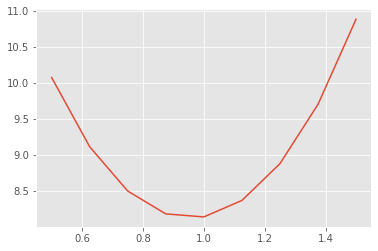

In [0]:
# 1.1
# try h = 0.125 -> N = (b-a)/h = 8
y, nodes = SecondOrderScheme(0.5, 1.5, 1, 0, alpha1, beta1, p1, q1, f1, N=8)

plt.figure()
plt.plot(nodes, y)

$h = 0.125$ оказался слишком большим шагом, метод работает нестабильно, решение получили далёкое от реальности. Найдём количество узлов $N$, необходимое для достижения точности 1e-4. *Относительную точность* считаем как максимум ошибки по узлам для решений с $N$ и $2N$ узлов.

In [0]:
N_try = 10
y_new = SecondOrderScheme(0.5, 1.5, 1, 0, alpha1, beta1, p1, q1, f1, N=N_try)[0]
y_old = np.zeros(6)
err = np.max(np.abs(y_old - y_new[::2]))

while err > 1e-3:
    N_try = 2*N_try
    y_old = y_new
    y_new = SecondOrderScheme(0.5, 1.5, 1, 0, alpha1, beta1, p1, q1, f1, N=N_try)[0]
    err = np.max(np.abs(y_old - y_new[::2]))

print('Error: {0}, N = {1}'. format(err, N_try))

Error: 0.0006803735453146942, N = 1280


In [0]:
# 1.2
N_try = 10
y_new = FirstOrderScheme(0.5, 1.5, 1, 0, alpha1, beta1, p1, q1, f1, N=N_try)[0]
y_old = np.zeros(6)
err = np.max(np.abs(y_old - y_new[::2]))

while err > 1e-1:
    N_try = 2*N_try
    y_old = y_new
    y_new = FirstOrderScheme(0.5, 1.5, 1, 0, alpha1, beta1, p1, q1, f1, N=N_try)[0]
    err = np.max(np.abs(y_old - y_new[::2]))

print('Error: {0}, N = {1}'. format(err, N_try))

Error: 0.09860664034966682, N = 2560


В схеме с односторонней производной удаётся доползти до точности порядка 1e-2. Большей точности достигнуть не удалось. Вероятно это связано с тем, что в методе односторенней производной ошибка $\sim h$.

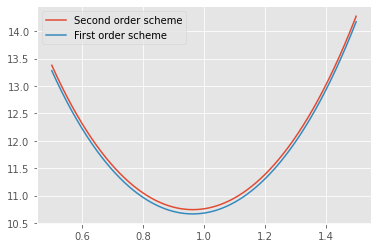

In [0]:
# 1.3
solution_scnd, grid_scnd = SecondOrderScheme(0.5, 1.5, 1, 0, alpha1, beta1, p1, q1, f1, N=1280)
solution_frst, grid_frst = FirstOrderScheme(0.5, 1.5, 1, 0, alpha1, beta1, p1, q1, f1, N=2560)

plt.figure()
plt.plot(grid_scnd, solution_scnd, label='Second order scheme')
plt.plot(grid_frst, solution_frst, label='First order scheme')
plt.legend()

Точность порядка 1e-2 в методе FirstOrderScheme() достигается на сетке в *два раза* большей чем в методе SecondOrderScheme(), причём во втором случае точность уже порядка 1e-4. Метод с использованием односторонней производной, FirstOrderScheme(), даёт очень грубую оценку решения уравнения. Метод с двусторонней производной, SecondOrderScheme(), решает задачу лучше. 

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [0]:
def p2(x):
    return 2*np.ones(len(x))

def q2(x):
    return -3 * x

def f2(x):
    return (2 - 8*x) / x**3

alpha2 = np.array([1, 0])
beta2 = np.array([1, 0])

In [0]:
# 2.1
N_try = 10
y_new = SecondOrderScheme(1, 2, 1, 0.5, alpha2, beta2, p2, q2, f2, N=N_try)[0]
y_old = np.zeros(6)
err = np.max(np.abs(y_old - y_new[::2]))

while err > 1e-5:
    N_try = 2*N_try
    y_old = y_new
    y_new = SecondOrderScheme(1, 2, 1, 0.5, alpha2, beta2, p2, q2, f2, N=N_try)[0]
    err = np.max(np.abs(y_old - y_new[::2]))

print('Error: {0}, N = {1}'. format(err, N_try))

Error: 2.526021473103768e-06, N = 160


Нужная относительная точность достигается довольно быстро на сетке с $N=160$.

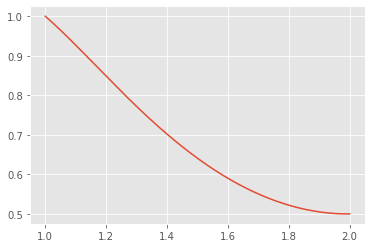

In [0]:
solution, nodes = \
    SecondOrderScheme(1, 2, 1, 0.5, alpha2, beta2, p2, q2, f2, N=160)
y_scndorder, nodes_scndorder = solution, nodes
plt.figure()
plt.plot(nodes, solution)

##Galerkin method
###Main idea:

1. Chose set of basis functions $\phi_i$ and 
$y_n(x)=\phi_0+\sum_{j=1}^n c_i\phi_i(x)$
2. Initial equation: $Ly_n=f \; \rightarrow$ system $L\left(\sum_{i=1}^m c_i \phi_i \right) = f -L(\phi_0)$
$L(\phi_0)=\phi_0''+p(x)\phi_0'+q(x)\phi_0$

$\sum_j^n (L\phi_j,\phi_i) c_j=(f,\phi_i) \; \rightarrow \sum_j M_{ij}c_j = d_i$

where $M_{ij}=(L\phi_j,\phi_i)$, $b_i=(f,\phi_i)$

and boundary conditions:

$l_a(\phi_0)=A$, $l_a(\phi_i)=0$, $\forall i>0$

$l_b(\phi_0)=B$, $l_a(\phi_i)=0$, $\forall i>0$


###Let's try the following base functions:

$\phi_0 = 1/x$

$\phi_k = (2-x)\cdot(1-x)^k$

In [0]:
# there we define base functions
def phi0(x):
    return 1/x

def dphi0(x):
    return -1/x**2

def ddphi0(x):
    return 2/x**3

def phi(k, x):
    return (2-x)*(1-x)**k

def dphi(k, x):
    return (1-x)**(k-1) * (-1 + x + k*(x-2))

def ddphi(k, x):
    return -k*(1-x)**(k-2) * (k*(x-2) + x)

In [0]:
# 2.2
N = 100
a, b = 1, 2
nodes = np.linspace(a, b, N)

def Galerkin(Np):

    # construct M matrix and d vector:
    M = np.zeros([Np, Np])
    d = np.zeros(Np)
    x = nodes[1:-1]
    for i in range(Np):
        d[i] = simps((f2(x) - ddphi0(x) - p2(x) * dphi0(x) - q2(x) * phi0(x)) * phi(i + 1, x), x=x)
        for j in range(Np):
            M[i, j] = simps((ddphi(j + 1, x) + p2(x) * dphi(j + 1, x) + q2(x) * phi(j + 1, x)) * phi(i + 1, x), x=x)
            # print(i, 'row', j, 'col')

    # solve LES M*coeff = d to find Galerkin coefficients
    coeff = LA.solve(M, d)

    # get the solution
    y = phi0(nodes)
    for j in range(1, Np):
        y += coeff[j] * phi(j, nodes)
    return y

# let's find the M matrix size to the desired precision 1e-6
Np_try = 4
y_new = Galerkin(Np_try)
err = 1

while err > 1e-5:
    Np_try = Np_try + 1
    y_old = y_new
    y_new = Galerkin(Np_try)
    err = LA.norm(y_old-y_new)
    print('Error: {0}, N = {1}'. format(err, Np_try))

y_galerkin = y_new
nodes_galerkin = nodes

Error: 0.03672163378008734, N = 5
Error: 0.006635536810035759, N = 6
Error: 0.0009793767628801684, N = 7
Error: 0.00015524206746361604, N = 8
Error: 2.6231737481003417e-05, N = 9
Error: 4.98960956800035e-06, N = 10


Относительная точность 1e-6 достигается при аппроксимации решения примерно 10-ю базисными полиномами.

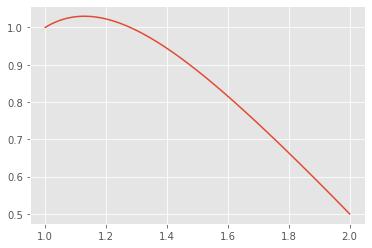

In [0]:
plt.figure()
plt.plot(nodes, y_galerkin)

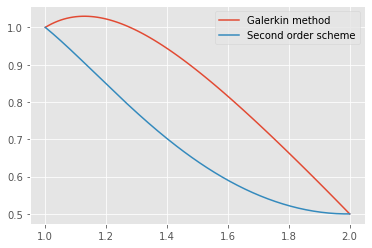

In [0]:
# 2.3
plt.figure()
plt.plot(nodes_galerkin, y_galerkin, label='Galerkin method')
plt.plot(nodes_scndorder, y_scndorder, label='Second order scheme')
plt.legend()

Судя по относительной точности, оба метода довольно быстро к чему-то сходятся. Очевидно из последнего графика, что разные методы дают разные решения одного и того же уравнения.

Что об этом думает вольфрам: https://drive.google.com/file/d/1JkA8ob0dJ3Zcy1woZHldpqv8w2ac7l1I/view?usp=sharing

Из графиков видно, что решение методом SecondOrderScheme() более походит на реальность, если ею считать вольфрам :)